# 大課題　ボストン住宅価格予測　決定木

## データを取得する

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [2]:
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['MEDV'])

## データ探索 

### 基本的なデータ探索について記述せよ
- このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)

データセットは、1970年代のボストン郊外地域の不動産物件に関するデータで、ある地域の平均物件価格と部屋の数や築年数といった物件情報、犯罪率や黒人比率などの人口統計に関する属性が付属しています。
つまり、ある地域の人口統計と物件に関する情報を元に、その地域の平均物件価格を予測するために作成されたデータセットであることがわかります。作成者は Harrison氏とRubinfeld氏で,1978年に作成された。

全部で14個のカラムがありますが、今回は最初の13個を説明変数、14個目を目的変数として使用することを想定しています。それぞれのカラムにある情報は以下です。

- CRIM : 犯罪発生率（人口単位）
- ZN : 25000平方フィート以上の住宅区間の割合
- INDUS : 非小売業の土地面積の割合（人口単位）
- CHAS : チャールズ川沿いかどうかフラグ（川沿いなら1、そうでなければ0）
- NOX : 窒素感化物の濃度（pphm単位）
- RM : 一戸あたりの平均部屋数
- AGE : 1940年よりも前に建てられた家屋の割合
- DIS : ボストンの主な5つの雇用圏までの重み付き距離
- RAD : 幹線道路へのアクセス指数
- TAX : 10000ドルあたりの所得税率
- PTRATIO : 教師あたりの生徒の数（人口単位）
- B : 1000(Bk - 0.63)^2として計算される量（Bkはアフリカ系アメリカ人居住者の割合（人口単位））
- LSTAT : 低所得者の割合
- MEDV : 住宅価格の中央値（単位は1000ドル）

### 一変数の可視化

In [3]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


## describeメソッドを用いることで把握できたこと(考察)を記述せよ

- 前処理に関して気をつけるべき点  
欠損値がないか、データ型が数値以外にカテゴリカルがあるか、外れ値があるかということがあげられます。

- 機械学習の手法選択に活かせること  
回帰か分類かを選択することに活かせる。例えば、目的変数の最小値、最大値がそれぞれ０と１であれば二値分類にすぐれたランダムフォレストを選択したりするなど手法選択の情報を得ることが可能。

- 機械学習の特徴選択について考えられること  
データ探索で、前処理の方法などの判断材料になる。たとえば特徴量内に含まれる欠損値が多い場合や、あまりにも特徴量数が多くかつ同じ意味をもつ特徴量が複数あればデータセットから削除するなど。

## 二変数の可視化

### 二変数の可視化、相関

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=y.join(X)
df.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.385832,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.385832,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,0.360445,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


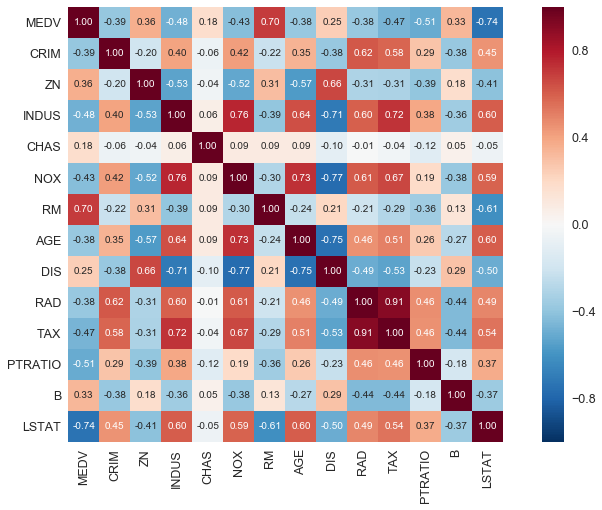

In [8]:
#　ヒートマップ
corrmat = df.corr()
cols = corrmat['MEDV'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(14,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 二変数の可視化について記述せよ　相関
#### そもそも相関とは何か  

一方の値が変化すれば、他方の値も変化するという関係性が顕著であること。

#### MEDVにもっとも相関があると出力された変数を3つほどあげよ  
LSTAT(-0.74),RM(0.7) ,PTRATIO (-0.51)

#### 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ） 
相関がある変数を多く判明すればするほど、モデル学習により、予測する精度をあげることに利用できる。


### 相関の注意点について記述せよ
便利な相関であるが、落とし穴がある

- 相関が正しく2変数の関係を表していない時がある、それはどのような場合か
  - 外れ値を持つ場合。

- その場合、どのような手段によって、確認するべきか
  - 散布図などで表示するなど、可視化を行って確認しなければならない。

## 二変数の可視化　プロット

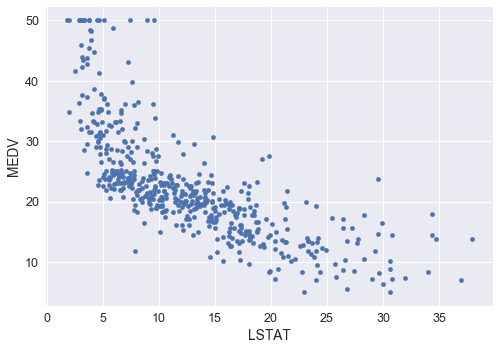

In [9]:
#散布図 LSTAT/MEDV
import matplotlib.pyplot as plt

var = 'LSTAT'
data = pd.concat([df['MEDV'], df[var]], axis=1)
data.plot.scatter(x=var, y='MEDV');
plt.show()

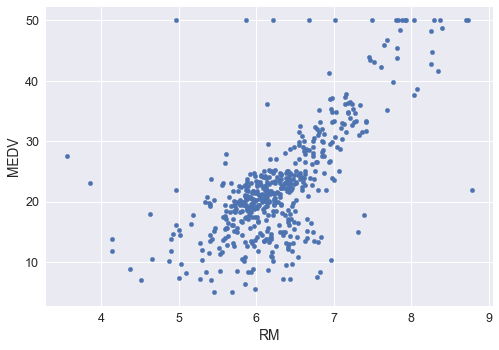

In [10]:
#散布図 RM/MEDV
import matplotlib.pyplot as plt

var = 'RM'
data = pd.concat([df['MEDV'], df[var]], axis=1)
data.plot.scatter(x=var, y='MEDV');
plt.show()

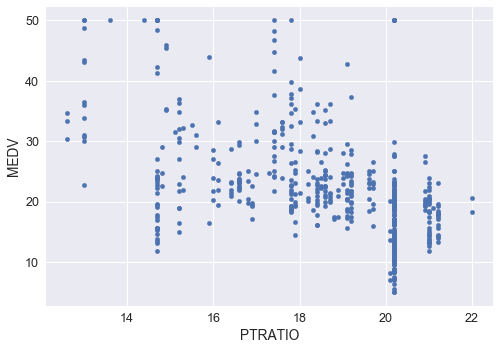

In [11]:
#散布図 PTRATIO/MEDV
import matplotlib.pyplot as plt

var = 'PTRATIO'
data = pd.concat([df['MEDV'], df[var]], axis=1)
data.plot.scatter(x=var, y='MEDV');
plt.show()

# データセット分割
7:3でデータセットをそれぞれトレーニング、テストに分割します。

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

 # 学習

In [202]:
from sklearn.tree import DecisionTreeRegressor
#深さを１から３まで変化
trees=[]
for i in  range(3):
    tree = DecisionTreeRegressor(max_depth = i+1)
    # 学習
    trees.append(tree.fit(X_train,y_train))

# 決定係数

In [203]:
for i,tree in enumerate(trees):
    print('Train score'+'深さ'+str(i+1)+' : {:.4f}'.format(tree.score(X_train, y_train)))
    print('Test score'+'深さ'+str(i+1)+' : {:.4f}'.format(tree.score(X_test, y_test)))

Train score深さ1 : 0.4374
Test score深さ1 : 0.4223
Train score深さ2 : 0.6994
Test score深さ2 : 0.6945
Train score深さ3 : 0.7985
Test score深さ3 : 0.7980


# 学習曲線

In [204]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment
max_depth1


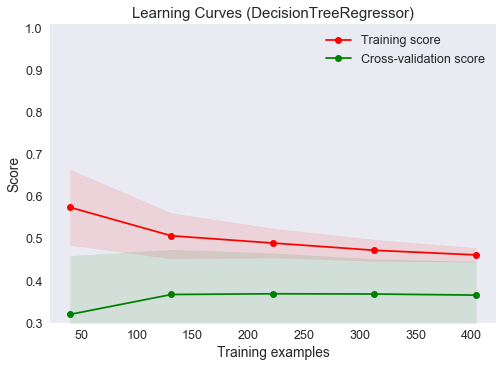

max_depth2


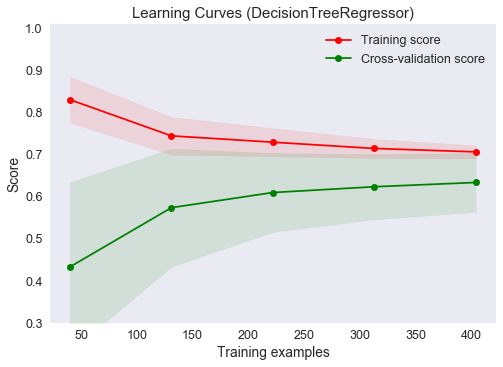

max_depth3


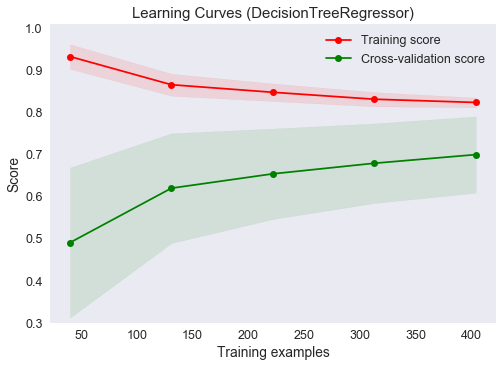

max_depth4


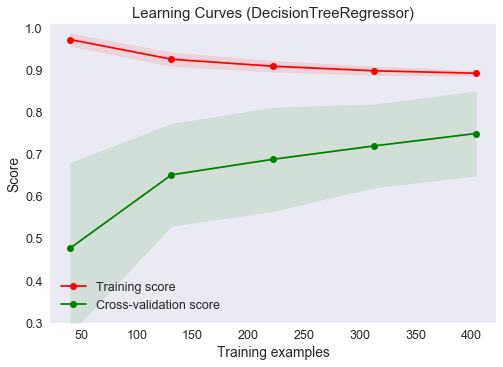

max_depth5


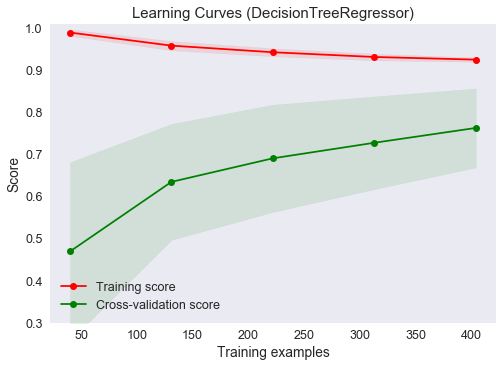

max_depth6


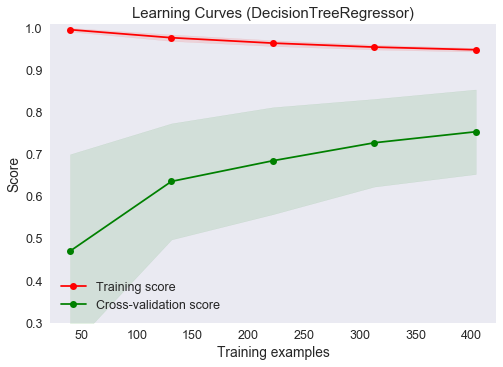

max_depth7


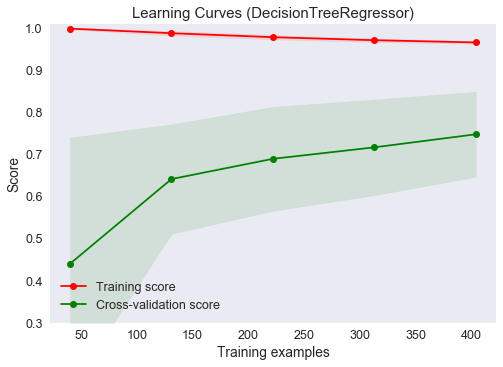

max_depth8


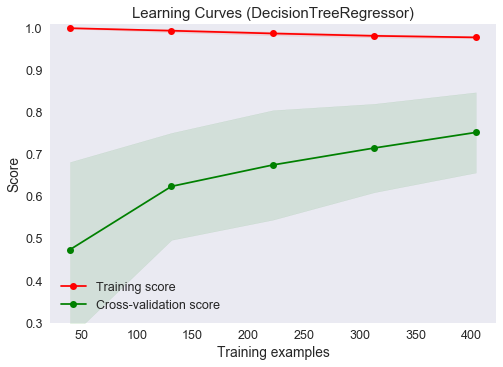

max_depth9


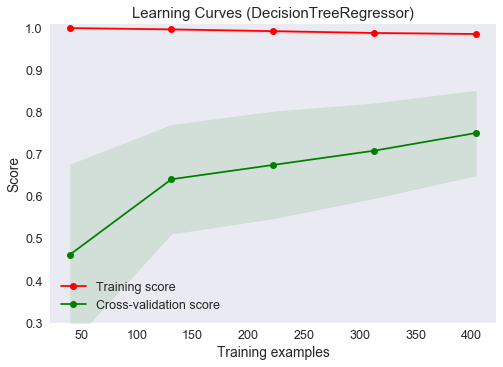

max_depth10


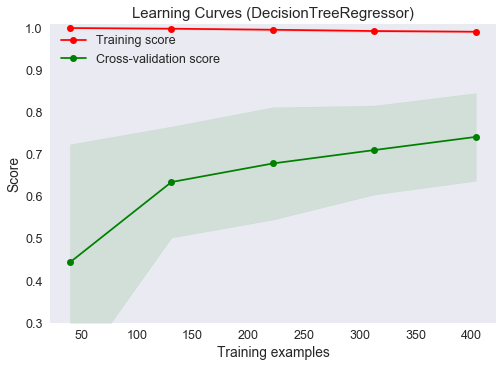

In [205]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

features =X
target=y

title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for degree in range(1,11):
    print('max_depth'+str(degree))
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title,features , target, ylim=(0.3, 1.01), 
                                        cv=cv, n_jobs=4)

    plt.show()

# 学習曲線について記述せよ

- High varianceとは何か  
過学習

- High Biasとは何か  
未学習

- もっとも結果が良いと思われた深さをひとつ選択せよ  
5

- なぜその深さが最も良いか記述せよ  
他のグラフより、データ数が増えていくにつれて折れ線グラフの傾きが右上がりで、値が比較的高い位置で学習スコアに近づきつつあり過学習も少ないと思われるため。

- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ  
クロスバリデーションスコアの折れ線が右肩上がりの傾向がある一方、学習スコアの折れ線が下降しているため、データ数を増やすと過学習が少なく、精度もよくなると思われる。

# グリッドサーチ

In [206]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


# グリッドサーチについて記述せよ

#### グリッドサーチとは何か  
あらかじめ設定した機械学習モデルのハイパーパラメータの全ての組み合わせに対して正答率を計算し、もっともいいものを選択してくれる機能。
大きなデータの場合は、一回のモデル学習に多大の時間がかかる。
#### グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ  
- ランダムサーチ
- 遺伝的アルゴリズム
- ベイズ最適化

#### その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか  
- ランダムサーチ  
    投入するパラメータをランダムに変えてモデルで試すため、学習の時間は短縮できるが、必ずしも最適解に到達するとは限らないため、最適解に近い値を早めに確認したい場合に使える。

- 遺伝的アルゴリズム  
　全探索が不可能と考えられるほど広大な解空間を持つ問題に有効。
 
- ベイズ最適化  
 　グリッドサーチより効率的に最適解に到達する。計算量を減らして最適解に到達したい場合に使える。 

# グリッドサーチを使いこなそう
#### グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、また結果を元にどの折りたたみ回数がベストなのか考察せよ  

<b>Kfoldの回数を3回に設定<b>

In [207]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print('Train score: {:.3f}'.format(grid.score(X_train, y_train)))

{'max_depth': 10}
Train score: 0.987


<b>Kfoldの回数を10回に設定<b>

In [208]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print('Train score: {:.3f}'.format(grid.score(X_train, y_train)))

{'max_depth': 5}
Train score: 0.919


    10回のKfoldの折りたたみ回数で値0.935と、５回の折りたたみ回数の0.899よりスコアが良かっため、１０回の折りたたみ回数がベストである。


#### グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ  

Kfoldの回数を3回に設定

In [209]:
# 平均二乗誤差の計算
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc='mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

#予測値を計算
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                         mean_squared_error(y_test, y_test_pred)))

{'max_depth': 6}
MSE train : 4.368, test : 16.439


Kfoldの回数を10回に設定

In [210]:
# 平均二乗誤差の計算
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc='mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

#予測値を計算
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                         mean_squared_error(y_test, y_test_pred)))

{'max_depth': 5}
MSE train : 6.218, test : 12.833


# テスト

In [223]:
tree = DecisionTreeRegressor(max_depth =5)
# 学習_
tree.fit(X_train,y_train)

print('Test score: {:.3f}'.format(tree.score(X_test, y_test)))

Test score: 0.874
